# The Recommender of Popularity

A popularity recommender is just that - a filter that returns movies based on popularity (or anything, really). This is a non-personalized recommender, and everyone will see the same results when presented with it. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
movies = pd.read_csv('/Users/user/final-capstone/inprogress3.csv')
movies.head()

/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response
0,Toy Story,1995,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,95.0,8.3,"788,709",tt0114709,movie,20-Mar-01,NaN,Buena Vista,http://www.disney.com/ToyStory,True
1,Jumanji,1995,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,39.0,7.0,"267,973",tt0113497,movie,25-Jan-00,NaN,Sony Pictures Home Entertainment,NaN,True
2,Grumpier Old Men,1995,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,46.0,6.6,"22,329",tt0113228,movie,18-Nov-97,NaN,Warner Home Video,NaN,True
3,Waiting to Exhale,1995,R,22-Dec-95,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,NaN,5.8,"8,640",tt0114885,movie,6-Mar-01,NaN,Twentieth Century Fox Home Entertainment,NaN,True
4,Father of the Bride Part II,1995,PG,8-Dec-95,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,49.0,6.0,"31,241",tt0113041,movie,9-May-00,NaN,Disney,NaN,True


In [27]:
# put in the weighted rating and title with year for all movies, filter out TV movies# Drop TV shows from the dataframe

movies = movies.drop(['website','response','type','ratings','metascore','dvd','box_office'],axis=1)


# Drop TV shows from the dataframe
ratings = ['TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'TV-Y', 'TV-13', 'TV-Y7']

for rating in ratings:
    movies = movies[movies.rated != rating]
    
    
# Drop a few other misc TV shows that snuck through
titles = ['The Mahabharata', 'Centennial', 'Dominion Tank Police', 'Children of Dune', 'Helen of Troy']

for title in titles:
    movies = movies[movies['title'] != title]

# putting together the year with the movie title
movies['year'] = movies['year'].apply(lambda x: str(x))
movies['title_year'] = movies['title'].map(str) + ' (' + movies['year'] + ')'
    

movies['year'] = movies['year'].str.strip('–')
movies = movies[movies['year'] != 'nan']
movies['year'] = pd.to_numeric(movies['year'])
movies['year'] = movies.year.astype(int)

print(movies.shape)


(274600, 19)


In [28]:
movies = movies.drop_duplicates(subset='title_year')
print('The shape is: ', movies.shape)

The shape is:  (265417, 19)


In [29]:
movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,language,country,awards,poster,imdb_rating,imdb_votes,imdb_id,production,title_year
0,Toy Story,1995,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,English,USA,Nominated for 3 Oscars. Another 23 wins & 17 n...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,8.3,"788,709",tt0114709,Buena Vista,Toy Story (1995)
1,Jumanji,1995,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,"English, French",USA,4 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BZTk2Zm...,7.0,"267,973",tt0113497,Sony Pictures Home Entertainment,Jumanji (1995)
2,Grumpier Old Men,1995,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,"English, Italian, German",USA,2 wins & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMjQxM2...,6.6,"22,329",tt0113228,Warner Home Video,Grumpier Old Men (1995)
3,Waiting to Exhale,1995,R,22-Dec-95,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",English,USA,8 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BYzcyMD...,5.8,"8,640",tt0114885,Twentieth Century Fox Home Entertainment,Waiting to Exhale (1995)
4,Father of the Bride Part II,1995,PG,8-Dec-95,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,English,USA,Nominated for 1 Golden Globe. Another 1 win & ...,https://m.media-amazon.com/images/M/MV5BOTEyNz...,6.0,"31,241",tt0113041,Disney,Father of the Bride Part II (1995)


### Top Movies Chart

The formula for calculating the Top Rated 250 Titles on IMDB gives a true Bayesian estimate:
 weighted rating 
 $$(WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C $$
where:  
R = average for the movie (mean) = (Rating)  
v = number of votes for the movie = (votes)  
m = minimum votes required to be listed in the Top 250 (currently 25000)  
C = the mean vote across the whole report (currently 7.0)  


We also need to determine a 'cutoff' of total votes, as we only want really popular movies. In this case we'll use the 95th percentile as our cutoff.

In [30]:
movies['imdb_votes'] = movies['imdb_votes'].str.replace(",","")
movies['imdb_votes'] = pd.to_numeric(movies['imdb_votes'])

vote_counts = movies[movies['imdb_votes'].notnull()]['imdb_votes'].astype('int')
vote_averages = movies[movies['imdb_rating'].notnull()]['imdb_rating'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.75)

def weighted_rating(x):
    v = x['imdb_votes']+1 # added +1 - Dan
    R = x['imdb_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

movies['weighted_rating'] = movies.apply(weighted_rating, axis=1)

In [31]:
# Calculating the 95th percentile

m = movies['imdb_votes'].quantile(0.95)
m

7690.79999999993

And we'll only want movies where the score is above the average of all scores.

In [32]:
# Calculating the average rating

rating_mean = movies['imdb_rating'].mean()
rating_mean

6.135664895231396

In [33]:
# Creating the dataframe of qualified movies

qualified = movies[(movies['imdb_votes'] >= m) & (movies['imdb_votes'].notnull()) & 
                   (movies['imdb_rating'].notnull()) & (movies['imdb_rating']>= rating_mean)][['title',
                    'year','imdb_votes','imdb_rating','weighted_rating','genre','title_year']]
                   
qualified['imdb_votes'] = qualified['imdb_votes'].astype('int')
qualified['imdb_rating'] = qualified['imdb_rating'].astype('int')
                   
print(qualified.shape)
                   

(6532, 7)


Overall, 6,532 movies qualified for our top popularity chart.

In [34]:
qualified = qualified.sort_values('weighted_rating', ascending=False).head(250)
qualified

,title,year,imdb_votes,imdb_rating,weighted_rating,genre,title_year
9831,The Chaos Class,1975,33306,9,9.363186,"Comedy, Drama",The Chaos Class (1975)
310,The Shawshank Redemption,1994,2084570,9,9.299422,Drama,The Shawshank Redemption (1994)
277114,Aynabaji,2016,18209,9,9.235016,"Crime, Mystery, Thriller",Aynabaji (2016)
159785,Wheels,2014,17281,9,9.231593,Drama,Wheels (2014)
16932,The Godfather,1972,1425400,9,9.199178,"Crime, Drama",The Godfather (1972)
168583,CM101MMXI Fundamentals,2013,41371,9,9.171907,"Documentary, Comedy",CM101MMXI Fundamentals (2013.0)
6948,The Dark Knight,2008,2056482,9,8.999463,"Action, Crime, Drama, Thriller",The Dark Knight (2008)
17104,The Godfather: Part II,1974,996807,9,8.998892,"Crime, Drama",The Godfather: Part II (1974)
16515,The Chaos Class Failed the Class,1976,19329,9,8.943813,Comedy,The Chaos Class Failed the Class (1976)
89330,Tosun Pasa,1976,18896,9,8.942548,"Comedy, History",Tosun Pasa (1976)


Text(0, 0.5, 'Votes in Tens of Millions')

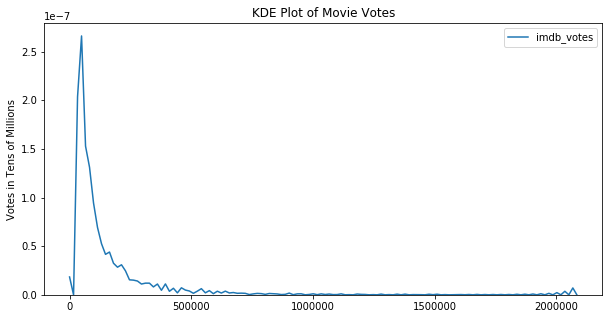

In [86]:
plt.figure(figsize=(10,5))
sns.kdeplot(movies['imdb_votes'].sort_values(ascending=False))
plt.title('KDE Plot of Movie Votes')
plt.ylabel('Votes in Tens of Millions')

In [39]:
movies['year'].min()

1891

So here we have a top 250 chart of movies. Note that the dataset includes movies from as early as 1894. The qualified dataset's oldest movie is from 1928. So this could be an **All Time High Popularity Chart**. However, due to the way that cinema changes, we probably also want a contemporary chart for movies that are newer, say from 1990 on.

## Popularity of all movies after 1990

In [76]:
# We will need to re-crunch the mean and quartile to get a good list of recent movies

recent_movs = movies[movies['year'] >= 1990]

recent_mean = recent_movs['imdb_rating'].mean()

recent_m = recent_movs['imdb_votes'].quantile(0.95)

recent_qualified = recent_movs[(recent_movs['imdb_votes'] >= recent_m) & (recent_movs['imdb_votes'].notnull()) & 
                   (recent_movs['imdb_rating'].notnull()) & (recent_movs['imdb_rating']>= recent_mean)][['title',
                    'year','imdb_votes','imdb_rating','weighted_rating','genre','title_year']]

print("The mean is: {}".format(recent_mean))
print("The cutoff is: {}".format(recent_m))
print(recent_qualified.shape)

The mean is: 6.13127029641394
The cutoff is: 11706.75
(4051, 7)


In [38]:
recent_qualified = recent_qualified.sort_values('weighted_rating', ascending=False).head(250)
recent_qualified

,title,year,imdb_votes,imdb_rating,weighted_rating,genre,title_year
310,The Shawshank Redemption,1994,2084570.0,9.3,9.299422,Drama,The Shawshank Redemption (1994)
277114,Aynabaji,2016,18209.0,9.3,9.235016,"Crime, Mystery, Thriller",Aynabaji (2016)
159785,Wheels,2014,17281.0,9.3,9.231593,Drama,Wheels (2014)
168583,CM101MMXI Fundamentals,2013,41371.0,9.2,9.171907,"Documentary, Comedy",CM101MMXI Fundamentals (2013.0)
6948,The Dark Knight,2008,2056482.0,9.0,8.999463,"Action, Crime, Drama, Thriller",The Dark Knight (2008)
288,Pulp Fiction,1994,1632190.0,8.9,8.899344,"Crime, Drama",Pulp Fiction (1994)
3894,The Lord of the Rings: The Return of the King,2003,1477575.0,8.9,8.899275,"Adventure, Drama, Fantasy",The Lord of the Rings: The Return of the King ...
516,Schindler's List,1993,1077467.0,8.9,8.899006,"Biography, Drama, History",Schindler's List (1993)
254244,Avengers: Endgame,2019,360133.0,8.9,8.897028,"Action, Adventure, Fantasy, Sci-Fi",Avengers: Endgame (2019)
8957,Inception,2010,1826846.0,8.8,8.799432,"Action, Adventure, Sci-Fi, Thriller",Inception (2010)


And there we go! 250 movies **from all time** or **since 1990**, ready to present based on popularity alone. Note that this returns movies from all over the world, and you can see right from the start that we are including foreign films in our list such as Aynabaji, a 2016 Bangladeshi crime thriller film. 

Our filters could be pared down even more by only including movies from the US or movies whose primary language was English. Personally, I'm happy to see my favorite movie, Spirited Away, at number 29 on this list. 

Text(0, 0.5, 'Weighted Rating')

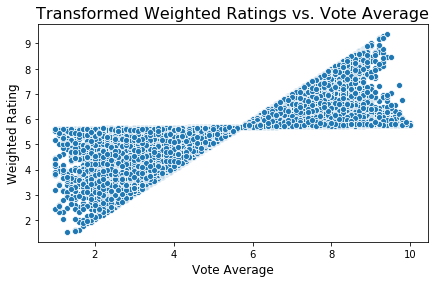

In [50]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='imdb_rating', y='weighted_rating',data=movies)
plt.title('Transformed Weighted Ratings vs. Vote Average',size=16)
plt.xlabel('Vote Average',size=12)
plt.ylabel('Weighted Rating',size=12)

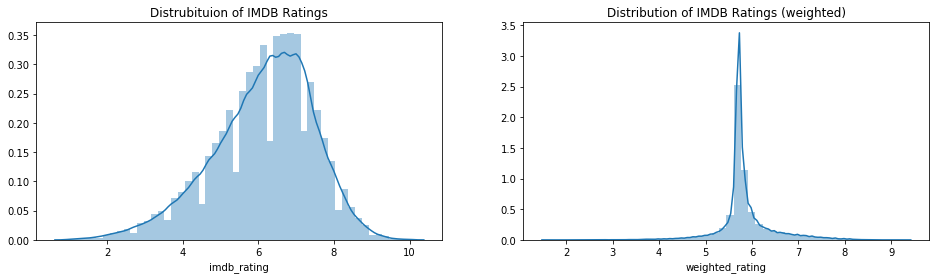

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(16,4))
axis[0].set_title('Distrubituion of IMDB Ratings')
axis[1].set_title('Distribution of IMDB Ratings (weighted)')
ax = sns.distplot(movies['imdb_rating'].dropna(), ax=axis[0])

ax = sns.distplot(movies['weighted_rating'].dropna(),ax=axis[1])

In [65]:
example = movies.sort_values('imdb_votes',ascending=False)
example[['title','imdb_votes','imdb_rating','weighted_rating']].head(10)

,title,imdb_votes,imdb_rating,weighted_rating
310,The Shawshank Redemption,2084570.0,9.3,9.299422
6948,The Dark Knight,2056482.0,9.0,8.999463
8957,Inception,1826846.0,8.8,8.799432
1939,Fight Club,1665349.0,8.8,8.799377
288,Pulp Fiction,1632190.0,8.9,8.899344
347,Forrest Gump,1598520.0,8.8,8.799351
2818,The Lord of the Rings: The Fellowship of the Ring,1503756.0,8.8,8.799310
1733,The Matrix,1500156.0,8.7,8.699330
3894,The Lord of the Rings: The Return of the King,1477575.0,8.9,8.899275
16932,The Godfather,1425400.0,9.2,9.199178


In [64]:
example[['title','imdb_votes','imdb_rating','weighted_rating']].dropna().tail(10)

,title,imdb_votes,imdb_rating,weighted_rating
103401,Cradlesong,5.0,2.8,5.640999
247008,The Most Gigantic Lying Mouth of All Time,5.0,7.6,5.725705
103480,Good Morning,5.0,6.4,5.704529
247022,Burning Calcutta,5.0,8.4,5.739823
103475,A Miracle from Heaven,5.0,5.8,5.693940
103427,Fu shi,5.0,5.6,5.690411
103426,Fondali notturni,5.0,7.2,5.718646
103422,Fine pena mai,5.0,5.2,5.683352
103411,Dou ji,5.0,5.0,5.679823
284301,Boishommo,5.0,6.8,5.711587


## Popularity of Movies included in The Movie Dataset

In [67]:
md = pd.read_csv('/Users/user/Downloads/the-movies-dataset/movies_metadata.csv')
cols = ['title','vote_average','vote_count']
md = md[cols]
md.head()

,title,vote_average,vote_count
0,Toy Story,7.7,5415.0
1,Jumanji,6.9,2413.0
2,Grumpier Old Men,6.5,92.0
3,Waiting to Exhale,6.1,34.0
4,Father of the Bride Part II,5.7,173.0


In [79]:
md.shape

(45466, 4)

In [72]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.75)

def weighted_rating(x):
    v = x['vote_count']+1 # added +1 - Dan
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

md['weighted_rating'] = md.apply(weighted_rating, axis=1)

In [74]:
# Crunch the numbers again

md_mean = md['vote_average'].mean()

md_m = md['vote_count'].quantile(0.95)

md_qualified = md[(md['vote_count'] >= md_m) & (md['vote_count'].notnull()) & 
                   (md['vote_average'].notnull()) & (md['vote_average']>= md_mean)]

print("The mean vote is: {}".format(md_mean))
print("Qualified movies have at least {} votes".format(md_m))
print("The original shape is: {}".format(md.shape))
print("The shape of our qualifying set is: {}".format(md_qualified.shape))

The mean vote is: 5.618207215133889
Qualified movies have at least 434.0 votes
The original shape is: (45466, 4)
The shape of our qualifying set is: (2008, 4)


In [77]:
md_qualified = md_qualified[md_qualified['title'] != 'Dilwale Dulhania Le Jayenge']

In [78]:
md_qualified = md_qualified.sort_values('weighted_rating', ascending=False).head(250)
md_qualified

,title,vote_average,vote_count,weighted_rating
314,The Shawshank Redemption,8.5,8358.0,8.486814
834,The Godfather,8.5,6024.0,8.481734
40251,Your Name.,8.5,1030.0,8.396081
12481,The Dark Knight,8.3,12269.0,8.291558
2843,Fight Club,8.3,9678.0,8.289306
292,Pulp Fiction,8.3,8670.0,8.288067
522,Schindler's List,8.3,4436.0,8.276767
23673,Whiplash,8.3,4376.0,8.276451
5481,Spirited Away,8.3,3968.0,8.274051
2211,Life Is Beautiful,8.3,3643.0,8.271758
